<a href="https://colab.research.google.com/github/HrgChampion/GenerativeAI/blob/main/langgraph_rag.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install langchain langchain-core langchain_community langgraph langchain-huggingface transformers torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 45.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.7/143.7 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 62.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 35.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 38.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2

In [5]:
from langchain_community.document_loaders import UnstructuredURLLoader
urls=['https://langchain-ai.github.io/langgraph/']
loader = UnstructuredURLLoader(urls=urls)
docs = loader.load()

In [4]:
!pip install unstructured

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 20.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 58.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 31.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.6/167.6 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 41.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.6/212.6 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 305.5/305.5 kB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.6/114.6 kB 9.0 MB/s eta 0:00:00
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993223 sha256=867e84ae43828fd7b096b118e3118e3614701be5eac9ea1eee037083dc879dd6
  Stored in directory: /root/.cache/pip/wheels/0a/f2/b2/e5ca405801e05eb7c8ed5b3b4bcf1fcabcd6272c167640072e
Successfully built langdetect


In [6]:
docs

[Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/'}, page_content='LangGraph\n\nLangGraph Logo\n\nLangGraph Logo\n\nVersion\n\nDownloads\n\nOpen Issues\n\nDocs\n\nTrusted by companies shaping the future of agents – including Klarna, Replit, Elastic, and more – LangGraph is a low-level orchestration framework for building, managing, and deploying long-running, stateful agents.\n\nGet started¶\n\nInstall LangGraph:\n\npip install -U langgraph\n\nThen, create an agent using prebuilt components:\n\n# pip install -qU "langchain[anthropic]" to call the model\n\nfrom langgraph.prebuilt import create_react_agent\n\ndef get_weather(city: str) -> str:\n    """Get weather for a given city."""\n    return f"It\'s always sunny in {city}!"\n\nagent = create_react_agent(\n    model="anthropic:claude-3-7-sonnet-latest",\n    tools=[get_weather],\n    prompt="You are a helpful assistant"\n)\n\n# Run the agent\nagent.invoke(\n    {"messages": [{"role": "user", "content": "what is 

In [7]:
from langchain_text_splitters import RecursiveCharacterTextSplitter
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)
all_splits = text_splitter.split_documents(docs)
print("Total number of documents",len(all_splits))

Total number of documents 5


In [9]:
from langchain_community.embeddings import HuggingFaceEmbeddings
embeddings = HuggingFaceEmbeddings()

vector = embeddings.embed_query("Hello world")
vector[:5]

/tmp/ipython-input-9-1453242074.py:2: LangChainDeprecationWarning: Default values for HuggingFaceEmbeddings.model_name were deprecated in LangChain 0.2.16 and will be removed in 0.4.0. Explicitly pass a model_name to the HuggingFaceEmbeddings constructor instead.
  embeddings = HuggingFaceEmbeddings()


[0.026249749585986137,
 0.013395590707659721,
 -0.004533143248409033,
 -0.021791450679302216,
 0.0545518696308136]

In [10]:
!pip install langchain_chroma

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 2.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.5/19.5 MB 54.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.2/284.2 kB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 77.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.6/101.6 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 82.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.7/55.7 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.5/118.5 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.2/196.2 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 9.0 MB/s eta

In [11]:
from langchain_chroma import Chroma
from langchain_core.documents import Document
vectorstore = Chroma.from_documents(all_splits, embeddings)

In [ ]:
from langchain_huggingface import HuggingFacePipeline
from langchain.prompts import PromptTemplate
import torch
from langchain_core.output_parsers import StrOutputParser
from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline

model_id = "tiiuae/falcon-7b"

text_generation_pipeline = pipeline(
    "text-generation",
    model=model_id,
    torch_dtype=torch.bfloat16,
    max_new_tokens=500,
    device_map="auto", # Add this line
    temperature=0.7,
    top_k=50
)

llm = HuggingFacePipeline(pipeline=text_generation_pipeline)

In [13]:
# from langchain_core.prompts import PromptTemplate
# template =""" Use the following pieces of context to answer the question at the end.
# If you don't know the answer, just say that you don't know, don't try to make up an answer.
# Use three sentences maximum and keep the answer as concise as possible.
# {context}
# Question: {question}
# Helpful Answer:
# """

# prompt = PromptTemplate.from_template(template)

from langchain import hub
prompt = hub.pull("rlm/rag-prompt")

/usr/local/lib/python3.11/dist-packages/langsmith/client.py:272: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
  warnings.warn(


In [14]:
from typing_extensions import List,TypedDict
class State(TypedDict):
      question:str
      context:List[Document]
      answer:str


In [15]:
def retrieve(state:State):
    retrieved_docs =vectorstore.similarity_search(state["question"],k=1)
    return {"context":retrieved_docs}

In [16]:
def generate(state:State):
    docs_content="\n\n".join([doc.page_content for doc in state["context"]])
    messages= prompt.invoke({"question":state["question"],"context":docs_content})
    response = llm.invoke(messages)
    return {"answer":response}

In [18]:
from langgraph.graph import START,StateGraph
graph_builder = StateGraph(State).add_sequence([retrieve,generate])
graph_builder.add_edge(START,"retrieve")
graph = graph_builder.compile()

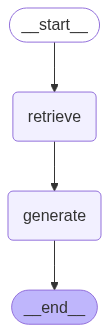

In [19]:
from IPython.display import Image,display
display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
response= graph.invoke({"question":"What is Langchain?"})
print(response["answer"])

Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
